In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [2]:
f=pd.read_csv("Mall_Customers.csv")
f

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


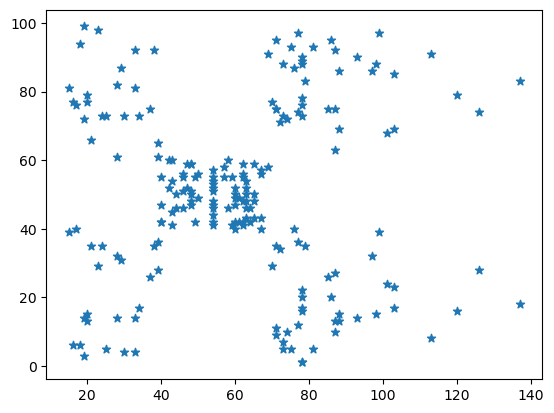

In [3]:
plt.scatter(f['Annual Income (k$)'],f['Spending Score (1-100)'],marker="*")

In [4]:
f=f.drop(['CustomerID','Gender','Age'],axis="columns")
f

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [5]:
k_range= range(1,11)
sse=[]
for i in k_range:
    km=KMeans(n_clusters=i)
    km.fit(f[['Annual Income (k$)','Spending Score (1-100)']])
    sse.append(km.inertia_)

C:\Users\sreen\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [6]:
sse

[269981.28,
 181363.595959596,
 106348.3730621112,
 73679.78903948834,
 44448.45544793371,
 37239.83554245604,
 30273.39431207004,
 25050.832307547527,
 21806.812998695455,
 19672.07284901432]

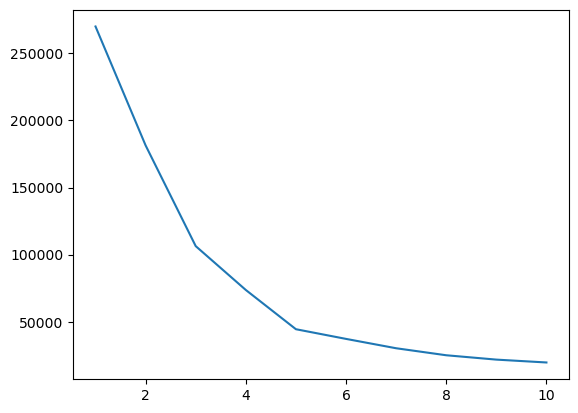

In [7]:
plt.plot(k_range,sse)

In [8]:
km1=KMeans(n_clusters=5)

In [9]:
f.predicted=km1.fit_predict(f[['Annual Income (k$)','Spending Score (1-100)']])
f.predicted

C:\Users\sreen\AppData\Local\Temp\ipykernel_23104\3327776484.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  f.predicted=km1.fit_predict(f[['Annual Income (k$)','Spending Score (1-100)']])


array([1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 4,
       1, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 0, 2, 4, 2, 0, 2, 0, 2,
       4, 2, 0, 2, 0, 2, 0, 2, 0, 2, 4, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

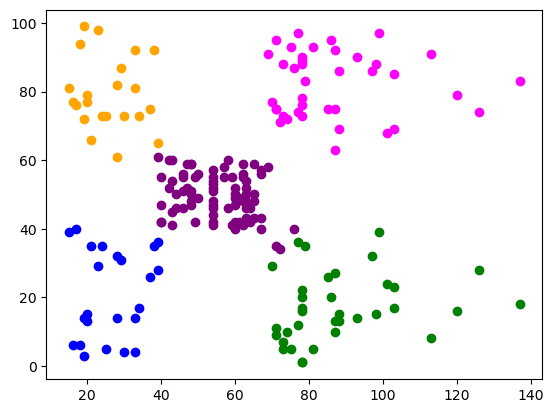

In [10]:
f1=f[f.predicted==0]
f2=f[f.predicted==1]
f3=f[f.predicted==2]
f4=f[f.predicted==3]
f5=f[f.predicted==4]
plt.scatter(f1["Annual Income (k$)"],f1["Spending Score (1-100)"],color="green")
plt.scatter(f2["Annual Income (k$)"],f2["Spending Score (1-100)"],color="blue")
plt.scatter(f3["Annual Income (k$)"],f3["Spending Score (1-100)"],color="magenta")
plt.scatter(f4["Annual Income (k$)"],f4["Spending Score (1-100)"],color="orange")
plt.scatter(f5["Annual Income (k$)"],f5["Spending Score (1-100)"],color="purple")



In [11]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(f[['Annual Income (k$)','Spending Score (1-100)']], km1.labels_)

silhouette_avg

0.553931997444648